In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.datasets import load_breast_cancer
import random as python_random

#set a bunch of random seeds so you should get the same results as me
np.random.seed(2023)
tf.random.set_seed(2023)
python_random.seed(123)

2023-03-22 02:16:23.718609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Note:** if the above imports didn't work it could be because you are using the wrong environment.

## Getting the data

Since this is a `sklearn` toy dataset we can use a built-in function to retrieve it.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

The data we loaded consists of multiple pieces. We are most interested in the inputs and the targets.

In [3]:
inputs = data['data']
targets = data['target']

In [4]:
print("number of malignant:", list(targets).count(0))
print("number of benign:", list(targets).count(1))

number of malignant: 212
number of benign: 357


In [5]:
inputs.shape

(569, 30)

The shape of `inputs` shows us that we have 569 observations or samples, and 30 features. In other words, the input to our neural network will be a vector in $\mathbb{R}^{30}$. Since there are two classes (WDBC-Malignant and WDBC-Benign), our output will be a vector in $\mathbb{R}^2$ encoding the classification just as we did for MNIST. 

In [6]:
from sklearn.model_selection import train_test_split
training_inputs, test_inputs, training_targets, test_targets = train_test_split(
    inputs, targets, test_size=0.2, random_state=2023
)

## Designing our network

There are no hard and fast rules for network architecture, but let's try the same one we used for MNIST: one hidden layer with 10 neurons. We'll also use the same cost function, and use sigmoid neurons throughout. With `keras`, we don't need to code up any of the linear algebra. We simply tell `keras` what layers we need. We will set up a `Sequential` model: this is `keras`'s name for our basic feedforward network. 

In [7]:
model = keras.Sequential()

2023-03-22 02:16:45.191825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We can specify the input shape in advance as follows.

In [8]:
model.add(keras.Input(shape=(30,)))

Hidden layer with 15 neurons

In [9]:
model.add(layers.Dense(15, activation="sigmoid"))

Finally we add an output layer with 2 neurons. One for WDBC-Malignant and one for WDBC-Benign.

In [10]:
model.add(layers.Dense(2, activation="sigmoid"))

We can now look at our model using `model.summary()` to make sure it makes sense.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 2)                 32        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


We see two layers, and output shapes which are (None)x(number of neurons). The "None" is there as a placeholder for the size of the training data. We can also already look at the weight matrices for this model, which for now are randomly initialized.

## Training the network

The next step is to train the network. We first _compile_ the model, choosing an optimization method, a loss and a metric to track along the way. We'll make the following choices:

- **loss**: we'll set the cost $C = \frac{1}{n} \sum_x ||y(x) - a||^2$ by using the keyword `MeanSquaredError`. 
- **optimization method**: we'll use stochastic gradient descent using the keyword `SGD`.
- **metrics**: we'll track the accuracy on the test dataset by using `CategoricalAccuracy()`.

In [12]:
model.compile(
    optimizer=keras.optimizers.SGD(),  # Optimizer
    loss=keras.losses.MeanSquaredError(), # Cost or loss function
    metrics=[keras.metrics.CategoricalAccuracy()],
)

Before we train our network, we need to make sure we have the right targets. Right now our targets are categorical values, i.e. just the classification number:

In [13]:
training_targets

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

We need to convert this to a list of binary vectors of length $2$ just as we did for MNIST. Fortunately, `tensorflow` has a built-in function for this called `one_hot`. The arguments are the labels, and the depth, i.e. the length of vectors we want. 

In [13]:
training_target_vectors = tf.one_hot(training_targets, depth=2) #[1. 0.] = malignant and [0. 1.] = benign

We'll do the same for our test data.

In [14]:
test_target_vectors = tf.one_hot(test_targets, depth=2)

Finally, we are ready to train our network. We call the `.fit()` method for our model, giving it the training inputs, training targets, a batch size and a number of epochs. Since we want to track our accuracy on test data, we also give that data to the function via the `validation_data` keyword.

In [15]:
history = model.fit(
    training_inputs,
    training_target_vectors,
    batch_size=10,
    epochs=200,
    validation_data=(test_inputs, test_target_vectors),
)

Epoch 1/200
46/46 [==============================] - 2s 19ms/step - loss: 0.2636 - categorical_accuracy: 0.6330 - val_loss: 0.2539 - val_categorical_accuracy: 0.6316
Epoch 2/200
46/46 [==============================] - 0s 11ms/step - loss: 0.2525 - categorical_accuracy: 0.6330 - val_loss: 0.2470 - val_categorical_accuracy: 0.6316
Epoch 3/200
46/46 [==============================] - 0s 11ms/step - loss: 0.2415 - categorical_accuracy: 0.6462 - val_loss: 0.2401 - val_categorical_accuracy: 0.6316
Epoch 4/200
46/46 [==============================] - 0s 9ms/step - loss: 0.2439 - categorical_accuracy: 0.5714 - val_loss: 0.2576 - val_categorical_accuracy: 0.3772
Epoch 5/200
46/46 [==============================] - 0s 9ms/step - loss: 0.2482 - categorical_accuracy: 0.5187 - val_loss: 0.2462 - val_categorical_accuracy: 0.6228
Epoch 6/200
46/46 [==============================] - 0s 9ms/step - loss: 0.2424 - categorical_accuracy: 0.6286 - val_loss: 0.2399 - val_categorical_accuracy: 0.6228
Epoch 7

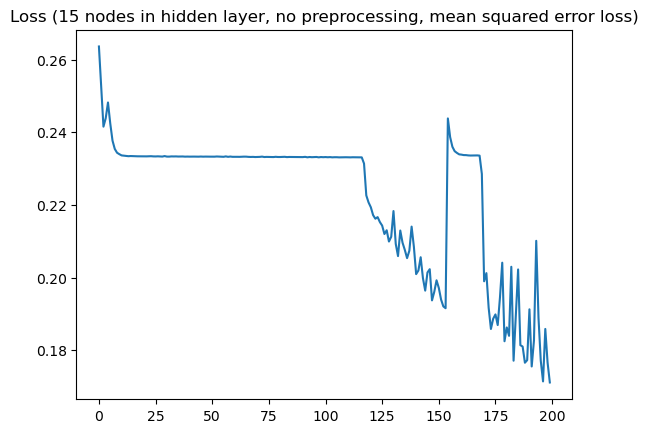

In [16]:
import matplotlib.pyplot as plt
plt.title('Loss (15 nodes in hidden layer, no preprocessing, mean squared error loss)')
plt.plot(
    history.history['loss']
)

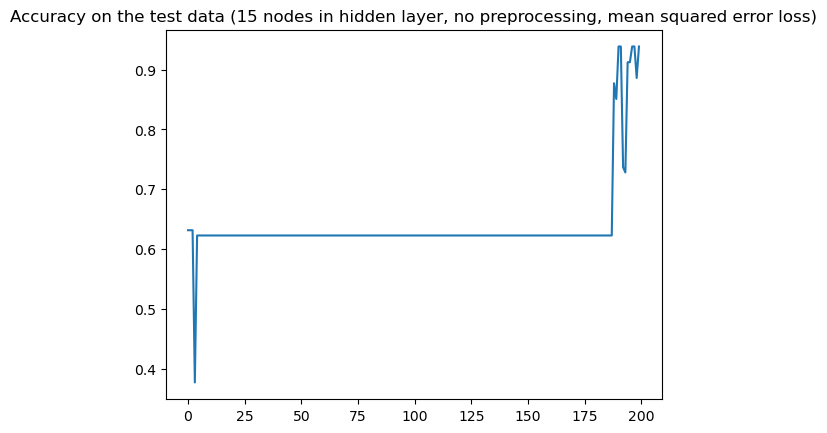

In [17]:
plt.title('Accuracy on the test data (15 nodes in hidden layer, no preprocessing, mean squared error loss)')
plt.plot(
    history.history['val_categorical_accuracy']
)

In [19]:
model.save('mymodel1')

INFO:tensorflow:Assets written to: mymodel1/assets


In [22]:
model = keras.models.load_model('mymodel1')
model.evaluate(test_inputs, test_target_vectors)

4/4 [==============================] - 0s 2ms/step - loss: 0.1551 - categorical_accuracy: 0.9386


[0.15509022772312164, 0.9385964870452881]

Now, we will try the binary cross entropy loss function. We will also shift and rescale all the data values to lie between 0 and 1

Let's train our network again, but using the scaled training and test inputs. Note that if we just rerun `model.fit()` we'll start with the weights that the previous training session ended with. There are few tricks to reset the weights, but it's sometimes easier to just rebuild the whole model, so we'll do that.

In [34]:
from sklearn.preprocessing import MinMaxScaler
training_inputs_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(training_inputs)
test_inputs_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(test_inputs)

In [37]:
model2 = keras.Sequential()
model2.compile(
    optimizer=keras.optimizers.SGD(),  # Optimizer
    loss=keras.losses.BinaryCrossentropy(), # Cost or loss function
    metrics=[keras.metrics.CategoricalAccuracy()],
)
model2.add(keras.Input(shape=(30,)))
model2.add(layers.Dense(15, activation="sigmoid"))
model2.add(layers.Dense(2, activation="sigmoid"))
history2 = model2.fit(
    training_inputs_scaled,
    training_target_vectors,
    batch_size=10,
    epochs=200,
    validation_data=(test_inputs_scaled, test_target_vectors),
)

Epoch 1/200
46/46 [==============================] - 2s 21ms/step - loss: 0.7204 - categorical_accuracy: 0.3824 - val_loss: 0.7089 - val_categorical_accuracy: 0.6053
Epoch 2/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6952 - categorical_accuracy: 0.6198 - val_loss: 0.6912 - val_categorical_accuracy: 0.6228
Epoch 3/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6804 - categorical_accuracy: 0.6286 - val_loss: 0.6817 - val_categorical_accuracy: 0.6228
Epoch 4/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6722 - categorical_accuracy: 0.6286 - val_loss: 0.6760 - val_categorical_accuracy: 0.6228
Epoch 5/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6669 - categorical_accuracy: 0.6286 - val_loss: 0.6725 - val_categorical_accuracy: 0.6228
Epoch 6/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6636 - categorical_accuracy: 0.6286 - val_loss: 0.6699 - val_categorical_accuracy: 0.6228
Epoc

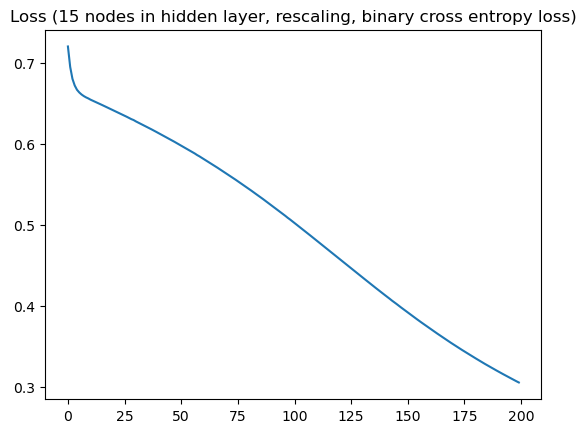

In [39]:
plt.title('Loss (15 nodes in hidden layer, rescaling, binary cross entropy loss)')
plt.plot(
    history2.history['loss']
)

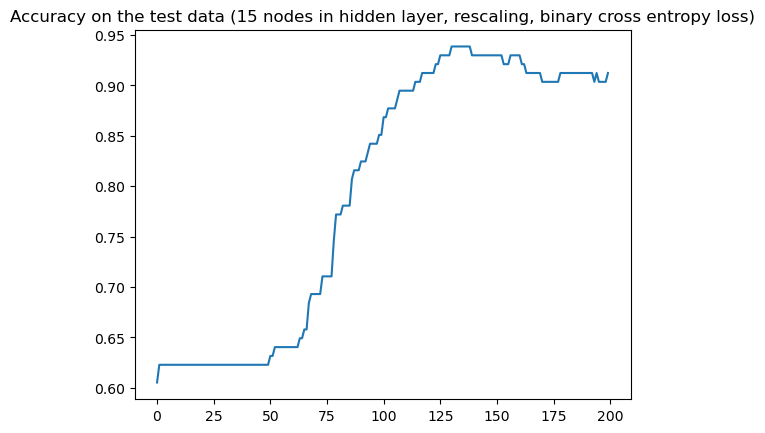

In [40]:
plt.title('Accuracy on the test data (15 nodes in hidden layer, rescaling, binary cross entropy loss)')
plt.plot(
    history2.history['val_categorical_accuracy']
)

Add another hidden layer with 10 nodes, scaled still, vary learning rates

In [41]:
histories = []
model_3_variations=[]
for rate in [0.01, 0.1, 1, 2]: 
    model3 = keras.Sequential()
    model3.compile(
        optimizer=keras.optimizers.SGD(),  # Optimizer
        loss=keras.losses.BinaryCrossentropy(), # Cost or loss function
        metrics=[keras.metrics.CategoricalAccuracy()],
    )
    model3.add(keras.Input(shape=(30,)))
    model3.add(layers.Dense(15, activation="sigmoid"))
    model3.add(layers.Dense(10, activation="sigmoid"))
    model3.add(layers.Dense(2, activation="sigmoid"))
    history3 = model3.fit(
        training_inputs_scaled,
        training_target_vectors,
        batch_size=10,
        epochs=200,
        validation_data=(test_inputs_scaled, test_target_vectors),
    )
    histories.append(history3)
    model_3_variations.append(model3)

Epoch 1/200
46/46 [==============================] - 2s 20ms/step - loss: 0.8558 - categorical_accuracy: 0.3714 - val_loss: 0.8047 - val_categorical_accuracy: 0.3772
Epoch 2/200
46/46 [==============================] - 1s 12ms/step - loss: 0.7746 - categorical_accuracy: 0.3714 - val_loss: 0.7433 - val_categorical_accuracy: 0.3772
Epoch 3/200
46/46 [==============================] - 1s 12ms/step - loss: 0.7264 - categorical_accuracy: 0.3714 - val_loss: 0.7093 - val_categorical_accuracy: 0.3772
Epoch 4/200
46/46 [==============================] - 1s 13ms/step - loss: 0.6993 - categorical_accuracy: 0.4220 - val_loss: 0.6891 - val_categorical_accuracy: 0.6404
Epoch 5/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6832 - categorical_accuracy: 0.6286 - val_loss: 0.6780 - val_categorical_accuracy: 0.6228
Epoch 6/200
46/46 [==============================] - 1s 11ms/step - loss: 0.6743 - categorical_accuracy: 0.6286 - val_loss: 0.6713 - val_categorical_accuracy: 0.6228
Epoc

Text(0, 0.5, 'Loss')

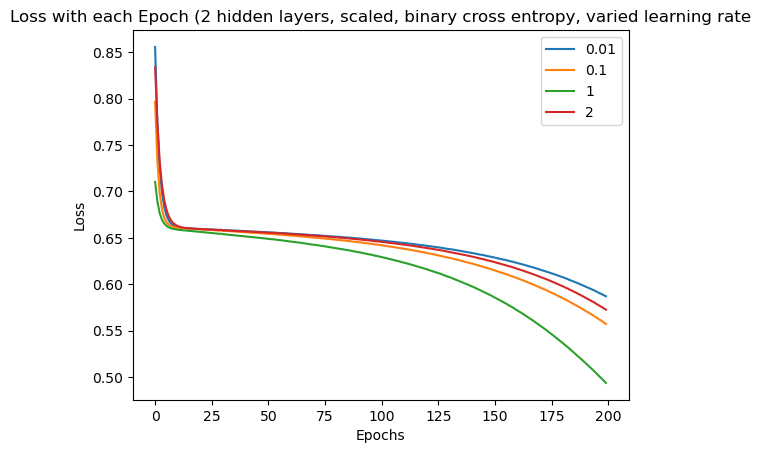

In [42]:
import matplotlib.pyplot as plt
plt.title('Loss with each Epoch (2 hidden layers, scaled, binary cross entropy, varied learning rate')
for history in histories:
    plt.plot(
    history.history['loss']
    )
labels = []
for rate in [0.01, 0.1, 1, 2]: 
    labels.append(f'{rate}')
plt.legend(labels, loc ="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

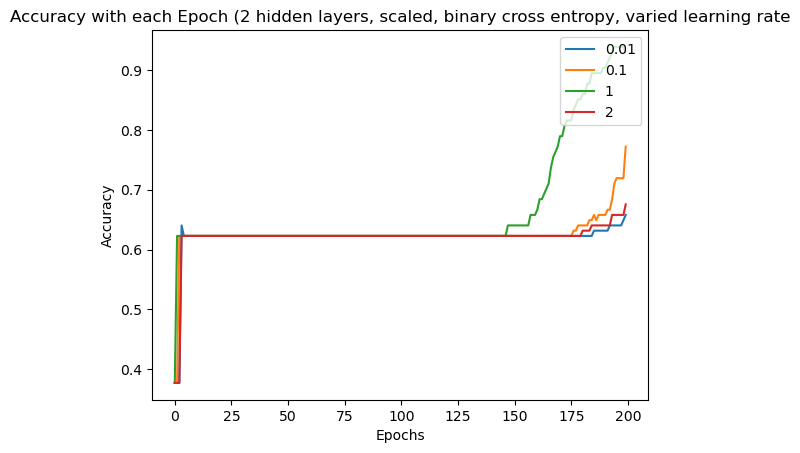

In [43]:
import matplotlib.pyplot as plt
plt.title('Accuracy with each Epoch (2 hidden layers, scaled, binary cross entropy, varied learning rate')
for history in histories:
    plt.plot(
    history.history['val_categorical_accuracy']
    )
labels = []
for rate in [0.01, 0.1, 1, 2]: 
    labels.append(f'{rate}')
plt.legend(labels, loc ="upper right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

To store the model for later, one thing we can do is to save the whole model.

In [44]:
model.save('mymodel1')
model2.save('mymodel2')
for n in range(len(model_3_variations)):
    model_3_variations[n].save(f'mymodel{n+3}')

INFO:tensorflow:Assets written to: mymodel1/assets
INFO:tensorflow:Assets written to: mymodel2/assets
INFO:tensorflow:Assets written to: mymodel3/assets
INFO:tensorflow:Assets written to: mymodel4/assets
INFO:tensorflow:Assets written to: mymodel5/assets
INFO:tensorflow:Assets written to: mymodel6/assets


In [23]:
model = keras.models.load_model('mymodel1')
model.evaluate(test_inputs, test_target_vectors)

4/4 [==============================] - 0s 22ms/step - loss: 0.1551 - categorical_accuracy: 0.9386


[0.15509022772312164, 0.9385964870452881]

In [46]:
model = keras.models.load_model('mymodel2')
model.evaluate(test_inputs_scaled, test_target_vectors)

4/4 [==============================] - 0s 24ms/step - loss: 0.2979 - categorical_accuracy: 0.9123


[0.2979024052619934, 0.9122806787490845]

In [47]:
model = keras.models.load_model('mymodel3')
model.evaluate(test_inputs_scaled, test_target_vectors)

4/4 [==============================] - 0s 2ms/step - loss: 0.5780 - categorical_accuracy: 0.6579


[0.5779551863670349, 0.6578947305679321]

In [48]:
model = keras.models.load_model('mymodel4')
model.evaluate(test_inputs_scaled, test_target_vectors)

4/4 [==============================] - 0s 20ms/step - loss: 0.5479 - categorical_accuracy: 0.7719


[0.5479337573051453, 0.7719298005104065]

In [49]:
model = keras.models.load_model('mymodel5')
model.evaluate(test_inputs_scaled, test_target_vectors)

4/4 [==============================] - 0s 2ms/step - loss: 0.4848 - categorical_accuracy: 0.9298


[0.48483219742774963, 0.9298245906829834]

In [50]:
model = keras.models.load_model('mymodel6')
model.evaluate(test_inputs_scaled, test_target_vectors)

4/4 [==============================] - 0s 22ms/step - loss: 0.5619 - categorical_accuracy: 0.6754


[0.5618500113487244, 0.6754385828971863]